# 1. Read and import data

In [1]:
import math  
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
dataset = pd.read_csv('../data/salary.csv', sep='|')

**Cek Cek Dulu**

In [3]:
dataset.head()

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
0,1,Facility Maintenance & Smart Warehouse Manager,Bandung,IDR,Manajer/Asisten Manajer,5 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pemeliharaan",NaN,NaN,NaN,NaN,Deskripsi PekerjaanRequirements :D3/SI from re...,NaN
1,2,Procurement Department Head,Jakarta Raya,IDR,Manajer/Asisten Manajer,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",NaN,25 days,51 - 200 pekerja,Manajemen/Konsulting HR,Job Role: 1. Responsible for material availabi...,NaN
2,3,SALES ADMIN,Jakarta Barat,IDR,Supervisor/Koordinator,4 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel","Waktu regular, Senin - Jumat;Bisnis (contoh: K...",30 days,51 - 200 pekerja,Umum & Grosir,Internal Sales & AdminJob Description :We are ...,NaN
3,4,City Operation Lead Shopee Express (Cirebon),Cirebon,IDR,Supervisor/Koordinator,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Pelayanan,Logistik/Rantai Pasokan","Tip;Waktu regular, Senin - Jumat;Kasual (conto...",21 days,2001 - 5000 pekerja,Retail/Merchandise,Job Description:Responsible for HSE implementa...,NaN
4,5,Japanese Interpreter,Bekasi,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Lainnya,Jurnalis/Editor",NaN,23 days,201 - 500 pekerja,Manajemen/Konsulting HR,Overview: Our clients is manufacture for autom...,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34746 entries, 0 to 34745
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34746 non-null  int64  
 1   job_title             34746 non-null  object 
 2   location              34746 non-null  object 
 3   salary_currency       34742 non-null  object 
 4   career_level          34746 non-null  object 
 5   experience_level      30205 non-null  object 
 6   education_level       34746 non-null  object 
 7   employment_type       33402 non-null  object 
 8   job_function          34746 non-null  object 
 9   job_benefits          27330 non-null  object 
 10  company_process_time  24555 non-null  object 
 11  company_size          29103 non-null  object 
 12  company_industry      33132 non-null  object 
 13  job_description       34745 non-null  object 
 14  salary                9352 non-null   float64
dtypes: float64(1), int6

In [5]:
dataset.isna().sum()

id                          0
job_title                   0
location                    0
salary_currency             4
career_level                0
experience_level         4541
education_level             0
employment_type          1344
job_function                0
job_benefits             7416
company_process_time    10191
company_size             5643
company_industry         1614
job_description             1
salary                  25394
dtype: int64

# 2. Cleaning the data

**Drop kolom yang tidak diperlukan**

In [6]:
dataset = dataset.drop(labels=["id", "salary_currency", "job_benefits", "job_function", "job_description",
"company_process_time", "company_size", "company_industry", "location"], axis=1)

In [7]:
dataset["experience_level"] = dataset["experience_level"].str.replace("\D", "")

C:\Users\reost\AppData\Local\Temp\ipykernel_3764\1617876946.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset["experience_level"] = dataset["experience_level"].str.replace("\D", "")


**Mengisi Missing Value Salary**

In [8]:
dataset['salary'].fillna(dataset.groupby(["career_level"])['salary'].transform('median'), inplace=True)

**Mapping Education Level**

In [9]:
edu = []
for i in dataset['education_level']:
    if i == "Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1)":
        edu.append('D3 - S2')
    elif i == "Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2)":
        edu.append("S1 - S2")
    elif i == "Sarjana (S1)":
        edu.append("S1")     
    elif i == "SMA, SMU/SMK/STM":
        edu.append("SMA/SMU")      
    elif i == "SMA, SMU/SMK/STM, Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1)":
        edu.append("SMA/SMU - S1")  
    elif i == "SMA, SMU/SMK/STM, Sertifikat Professional, D3 (Diploma), D4 (Diploma)":
        edu.append("SMA/SMU - S1")
    elif i == "Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2)":
        edu.append("D3 - S2") 
    elif i == "Sertifikat Professional, D3 (Diploma), D4 (Diploma)":
        edu.append("D3 - S1") 
    elif i == "SMA, SMU/SMK/STM, Sarjana (S1)":
        edu.append("SMA/SMU - S1") 
    elif i == "Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2), Doktor (S3)":
        edu.append("S1 - S3")   
    elif i == "Diploma Pascasarjana, Gelar Professional, Magister (S2)":
        edu.append("S1 - S2")  
    elif i == "Sarjana (S1), Doktor (S3)":
        edu.append("S1 - S3")  
    elif i == "Sertifikat Professional, D3 (Diploma), D4 (Diploma), Diploma Pascasarjana, Gelar Professional, Magister (S2)":
        edu.append("D3 - S2")         
    elif i == "Diploma Pascasarjana, Gelar Professional, Magister (S2), Doktor (S3)":
        edu.append("S1 - S2")   
    elif i == "Doktor (S3)":
        edu.append("S3")     
    elif i == "SMA, SMU/SMK/STM, Sertifikat Professional, D3 (Diploma), D4 (Diploma), Diploma Pascasarjana, Gelar Professional, Magister (S2)":
        edu.append("SMA/SMU - S2")  
    elif i == "SMA, SMU/SMK/STM, Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2)":
        edu.append("SMA/SMU - S2")
    elif i == "SMA, SMU/SMK/STM, Sarjana (S1), Doktor (S3)":
        edu.append("S1 - S3")                                                                                                                                                                                         
    else:
        edu.append('Tidak terspesifikasi')
dataset['education_level'] = edu

**Outlier**

In [10]:
dataset.isna().sum()

job_title              0
career_level           0
experience_level    4541
education_level        0
employment_type     1344
salary              1399
dtype: int64

In [11]:
dataset.dropna(inplace=True)

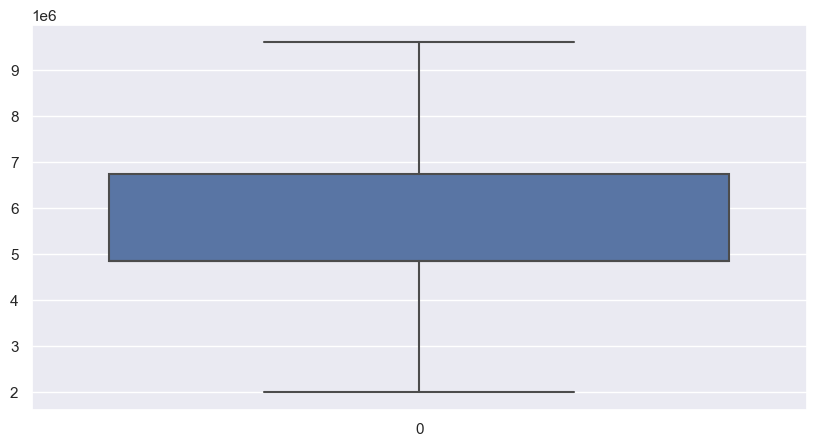

In [12]:
# Salary
per25Salary = dataset['salary'].quantile(0.25)
per75Salary = dataset['salary'].quantile(0.75)
iqrSalary = per75Salary - per25Salary

lower_limit = per25Salary - 1.5 * iqrSalary
upper_limit = per75Salary + 1.5 * iqrSalary

dataset = dataset[~((dataset["salary"] < (lower_limit)) | (dataset["salary"] > (upper_limit)))]
dataset.reset_index(drop=True, inplace=True)

sns.set(rc={'figure.figsize':(10, 5)})
sns.boxplot(dataset["salary"])
plt.show()

**Cek Duplikasi Data**

In [13]:
print("Duplikasi Sebelum Di Drop: ", dataset.duplicated().sum())
dataset.drop_duplicates(keep='first', inplace=True)
print("Duplikasi Setelah Di Drop: ", dataset.duplicated().sum())

Duplikasi Sebelum Di Drop:  5105
Duplikasi Setelah Di Drop:  0


# 3. Discovering Data

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19749 entries, 0 to 24853
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   job_title         19749 non-null  object 
 1   career_level      19749 non-null  object 
 2   experience_level  19749 non-null  object 
 3   education_level   19749 non-null  object 
 4   employment_type   19749 non-null  object 
 5   salary            19749 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.1+ MB


**Grouping Categorical & Numerical**

In [15]:
categorical = list(dataset.select_dtypes(include='object'))
print(categorical)

['job_title', 'career_level', 'experience_level', 'education_level', 'employment_type']


In [16]:
dataset[categorical].describe() 

,job_title,career_level,experience_level,education_level,employment_type
count,19749,19749,19749,19749,19749
unique,14640,5,15,10,7
top,Sales Executive,Pegawai (non-manajemen & non-supervisor),1,S1,Penuh Waktu
freq,84,14048,7810,6615,16747


In [17]:
numerical = dataset.columns[dataset.dtypes != 'object'].tolist()
print(numerical)

['salary']


In [18]:
dataset[numerical].describe()

,salary
count,1.974900e+04
mean,5.363955e+06
std,1.202457e+06
min,2.000000e+06
25%,4.850000e+06
50%,4.850000e+06
75%,6.750000e+06
max,9.600000e+06


# 4. Data Preprocessing

In [19]:
X = dataset.drop(["salary", "job_title"], axis=1)
y = dataset['salary']

In [20]:
X_train,X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

print(f'Traning Data: {X_train.shape}')
print(f'Testing Data: {X_test.shape}')

Traning Data: (15799, 4)
Testing Data: (3950, 4)


**Split Career Level**

In [21]:
enc_1 = OneHotEncoder(sparse_output=False)

X_train_career = enc_1.fit_transform(X_train[['career_level']])
X_test_career = enc_1.transform(X_test[['career_level']])
X_train_career

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [22]:
career_level = enc_1.get_feature_names_out(input_features=['career_level'])

X_train_career = pd.DataFrame(X_train_career, columns=career_level)
X_test_career = pd.DataFrame(X_test_career, columns=career_level)

X_train_career.head()

,career_level_CEO/GM/Direktur/Manajer Senior,career_level_Lulusan baru/Pengalaman kerja kurang dari 1 tahun,career_level_Manajer/Asisten Manajer,career_level_Pegawai (non-manajemen & non-supervisor),career_level_Supervisor/Koordinator
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


**Split Experience Level**

In [23]:
enc_2 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_experience = enc_2.fit_transform(X_train[['experience_level']])
X_test_experience = enc_2.transform(X_test[['experience_level']])
X_train_experience

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
experience_level = enc_2.get_feature_names_out(input_features=['experience_level'])

X_train_experience = pd.DataFrame(X_train_experience, columns=experience_level)
X_test_experience = pd.DataFrame(X_test_experience, columns=experience_level)

X_train_experience.head()

,experience_level_1,experience_level_10,experience_level_12,experience_level_15,experience_level_17,experience_level_18,experience_level_2,experience_level_20,experience_level_3,experience_level_4,experience_level_5,experience_level_6,experience_level_7,experience_level_8,experience_level_9
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Split Employment Type**

In [25]:
enc_3 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_employment = enc_3.fit_transform(X_train[['employment_type']])
X_test_employment = enc_3.transform(X_test[['employment_type']])
X_train_employment

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [26]:
employment_type = enc_3.get_feature_names_out(input_features=['employment_type'])

X_train_employment = pd.DataFrame(X_train_employment, columns=employment_type)
X_test_employment = pd.DataFrame(X_test_employment, columns=employment_type)

X_train_employment.head()

,employment_type_Kontrak,employment_type_Paruh Waktu,employment_type_Penuh Waktu,"employment_type_Penuh Waktu, Kontrak","employment_type_Penuh Waktu, Paruh Waktu",employment_type_Temporer
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


**Split Education Level**

In [27]:
enc_4 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_education = enc_4.fit_transform(X_train[['education_level']])
X_test_education = enc_4.transform(X_test[['education_level']])
X_train_education

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [28]:
education_level = enc_4.get_feature_names_out(input_features=['education_level'])

X_train_education = pd.DataFrame(X_train_education, columns=education_level)
X_test_education = pd.DataFrame(X_test_education, columns=education_level)

X_train_education.head()

,education_level_D3 - S1,education_level_D3 - S2,education_level_S1,education_level_S1 - S2,education_level_S1 - S3,education_level_S3,education_level_SMA/SMU,education_level_SMA/SMU - S1,education_level_SMA/SMU - S2,education_level_Tidak terspesifikasi
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Reset Index**

In [29]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [30]:
X_train_new = pd.concat([X_train, X_train_career, X_train_experience, X_train_employment, X_train_education], axis=1)
X_train_new.drop(columns=['career_level', 'experience_level', 'employment_type', 'education_level'],inplace=True)

X_test_new = pd.concat([X_test, X_test_career, X_test_experience, X_test_employment, X_test_education], axis=1)
X_test_new.drop(columns=['career_level', 'experience_level', 'employment_type', 'education_level'],inplace=True)

X_train_new.head()

,career_level_CEO/GM/Direktur/Manajer Senior,career_level_Lulusan baru/Pengalaman kerja kurang dari 1 tahun,career_level_Manajer/Asisten Manajer,career_level_Pegawai (non-manajemen & non-supervisor),career_level_Supervisor/Koordinator,experience_level_1,experience_level_10,experience_level_12,experience_level_15,experience_level_17,...,education_level_D3 - S1,education_level_D3 - S2,education_level_S1,education_level_S1 - S2,education_level_S1 - S3,education_level_S3,education_level_SMA/SMU,education_level_SMA/SMU - S1,education_level_SMA/SMU - S2,education_level_Tidak terspesifikasi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# 5. Predict Data OLS

In [31]:
X_train_ols = sm.add_constant(X_train_new)
ModelOLS = sm.OLS(y_train, X_train_ols).fit()

In [32]:
print(ModelOLS.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:16:07   Log-Likelihood:            -2.3847e+05
No. Observations:               15799   AIC:                         4.770e+05
Df Residuals:                   15766   BIC:                         4.773e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

**Visualisasi Data Koefisien**

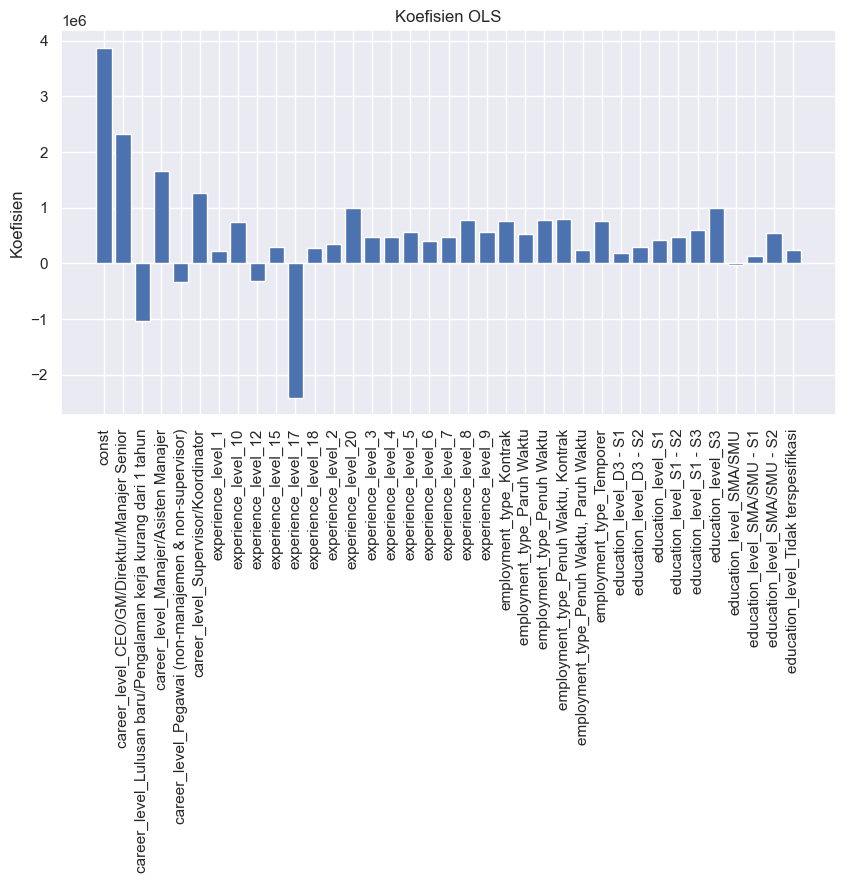

In [33]:
plt.bar(range(len(ModelOLS.params)), ModelOLS.params)
plt.xlabel('')
plt.ylabel('Koefisien')
plt.title('Koefisien OLS')
plt.xticks(range(len(ModelOLS.params)), X_train_ols.columns, rotation=90)
plt.show()

In [34]:
# Rumus MAPE Training Data
absolute_error_OLS_train = np.abs(y_train - ModelOLS.predict(X_train_ols))
percentage_error_OLS_train = absolute_error_OLS_train / y_train * 100

In [35]:
print('-------- Training Data OLS ---------')
y_train_OLS = ModelOLS.predict(sm.add_constant(X_train_new))
print("MSE  :", "{:.4f}".format(mean_squared_error(y_train, y_train_OLS)))
print("MAE  :", "{:.4f}".format(mean_absolute_error(y_train, y_train_OLS)))
print("RMSE :", "{:.4f}".format(math.sqrt(mean_squared_error(y_train, y_train_OLS))))
print("MAD  :", "{:.4f}".format(np.mean(np.abs(y_train - y_train_OLS))))
print("MAPE  :", "{:.4f}".format(np.mean(percentage_error_OLS_train)))

-------- Training Data OLS ---------
MSE  : 755099588286.1342
MAE  : 475091.8862
RMSE : 868964.6646
MAD  : 475091.8862
MAPE  : 9.7370


In [36]:
# Rumus MAPE Testing Data
absolute_error_OLS_test = np.abs(y_test - ModelOLS.predict(sm.add_constant(X_test_new)))
percentage_error_OLS_test = absolute_error_OLS_test / y_test * 100

In [37]:
print('-------- Testing Data OLS ---------')
y_test_OLS = ModelOLS.predict(sm.add_constant(X_test_new))
print("MSE  :", mean_squared_error(y_test, y_test_OLS))
print("MAE  :", mean_absolute_error(y_test, y_test_OLS))
print("RMSE :", math.sqrt(mean_squared_error(y_test, y_test_OLS)))
print("MAD  :", np.mean(np.abs(y_test - y_test_OLS)))
print("MAPE  :", "{:.4f}".format(np.mean(percentage_error_OLS_test)))

-------- Testing Data OLS ---------
MSE  : 793066467445.3829
MAE  : 490964.6607119703
RMSE : 890542.793719304
MAD  : 490964.6607119703
MAPE  : 10.0712


# 6. Predict Data Random Forest

In [38]:
modelRF = RandomForestRegressor(n_estimators=100, random_state=0)
modelRF.fit(X_train_new, y_train)

RandomForestRegressor(random_state=0)

In [39]:
parameter_estimate  = modelRF.feature_importances_
for variable, parameter_estimate  in zip(X_train_new.columns, parameter_estimate):
    print(f'{variable}: {parameter_estimate :.4e}')

career_level_CEO/GM/Direktur/Manajer Senior: 2.2619e-03
career_level_Lulusan baru/Pengalaman kerja kurang dari 1 tahun: 2.2530e-02
career_level_Manajer/Asisten Manajer: 1.1911e-01
career_level_Pegawai (non-manajemen & non-supervisor): 2.7523e-03
career_level_Supervisor/Koordinator: 7.4665e-01
experience_level_1: 2.1224e-02
experience_level_10: 1.1419e-03
experience_level_12: 2.2316e-04
experience_level_15: 2.0076e-06
experience_level_17: 6.9214e-04
experience_level_18: 1.8336e-06
experience_level_2: 9.9795e-03
experience_level_20: 2.7125e-04
experience_level_3: 3.3713e-03
experience_level_4: 2.8944e-03
experience_level_5: 3.1220e-03
experience_level_6: 1.2034e-04
experience_level_7: 9.1522e-04
experience_level_8: 8.9109e-04
experience_level_9: 3.2688e-07
employment_type_Kontrak: 5.9797e-03
employment_type_Paruh Waktu: 1.5481e-03
employment_type_Penuh Waktu: 5.2655e-03
employment_type_Penuh Waktu, Kontrak: 9.5872e-05
employment_type_Penuh Waktu, Paruh Waktu: 6.1242e-05
employment_type_T

**Visualisasi Data Koefisien**

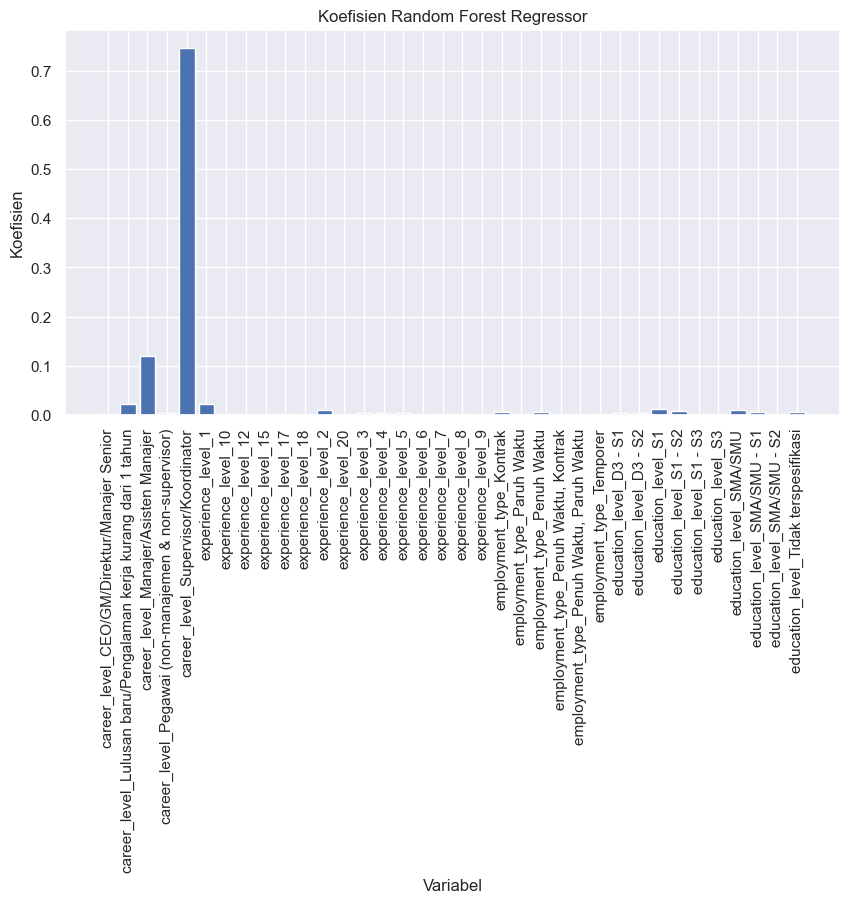

In [40]:
plt.bar(range(len(modelRF.feature_importances_)), modelRF.feature_importances_)
plt.xlabel('Variabel')
plt.ylabel('Koefisien')
plt.title('Koefisien Random Forest Regressor')
plt.xticks(range(len(modelRF.feature_importances_)), X_train_new.columns, rotation=90)
plt.show()

In [41]:
absolute_error_rf_train = np.abs(y_train - modelRF.predict(X_train_new))
percentage_error_rf_train = absolute_error_rf_train / y_train * 100

In [42]:
print('-------- Training Data Random Forest ---------')
y_train_pred_rf = modelRF.predict(X_train_new)
print("MSE  :", "{:.4f}".format(mean_squared_error(y_train, y_train_pred_rf)))
print("MAE  :", "{:.4f}".format(mean_absolute_error(y_train, y_train_pred_rf)))
print("RMSE :", "{:.4f}".format(math.sqrt(mean_squared_error(y_train, y_train_pred_rf))))
print("MAD  :", "{:.4f}".format(np.mean(np.abs(y_train - y_train_pred_rf))))
print("MAPE  :", "{:.4f}".format(np.mean(percentage_error_rf_train)))


-------- Training Data Random Forest ---------
MSE  : 721843979984.2803
MAE  : 462353.3993
RMSE : 849614.0182
MAD  : 462353.3993
MAPE  : 9.4978


In [43]:
absolute_error_rf_test = np.abs(y_test - modelRF.predict(X_test_new))
percentage_error_rf_test = absolute_error_rf_test / y_test * 100

In [44]:
print('\n-------- Testing Data Random Forest ---------')
y_test_pred_rf = modelRF.predict(X_test_new)
print("MSE  :", mean_squared_error(y_test, y_test_pred_rf))
print("MAE  :", mean_absolute_error(y_test, y_test_pred_rf))
print("RMSE :", math.sqrt(mean_squared_error(y_test, y_test_pred_rf)))
print("MAD  :", np.mean(np.abs(y_test - y_test_pred_rf)))
print("MAPE  :", "{:.4f}".format(np.mean(percentage_error_rf_test)))


-------- Testing Data Random Forest ---------
MSE  : 811800626306.4813
MAE  : 490678.42239972734
RMSE : 900999.7926228847
MAD  : 490678.42239972734
MAPE  : 10.0397


# Tes Ulang 

In [45]:
X_train_ulang = pd.concat([X_train, X_train_career], axis=1)
X_train_ulang.drop(columns=['career_level', 'experience_level', 'employment_type', 'education_level'],inplace=True)

X_test_ulang = pd.concat([X_test, X_test_career], axis=1)
X_test_ulang.drop(columns=['career_level', 'experience_level', 'employment_type', 'education_level'],inplace=True)

**Metode OLS**

In [46]:
X_train_ulang_ols = sm.add_constant(X_train_ulang)
ModelOLS_ulang = sm.OLS(y_train, X_train_ulang_ols).fit()
print(ModelOLS_ulang.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     3297.
Date:                Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:16:11   Log-Likelihood:            -2.3881e+05
No. Observations:               15799   AIC:                         4.776e+05
Df Residuals:                   15794   BIC:                         4.777e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [47]:
# Rumus MAPE Training Data
absolute_error_OLS_train = np.abs(y_train - ModelOLS_ulang.predict(X_train_ulang_ols))
percentage_error_OLS_train = absolute_error_OLS_train / y_train * 100

In [48]:
print('-------- Training Data OLS ---------')
y_train_OLS = ModelOLS_ulang.predict(sm.add_constant(X_train_ulang))
print("MSE  :", "{:.4f}".format(mean_squared_error(y_train, y_train_OLS)))
print("MAE  :", "{:.4f}".format(mean_absolute_error(y_train, y_train_OLS)))
print("RMSE :", "{:.4f}".format(math.sqrt(mean_squared_error(y_train, y_train_OLS))))
print("MAD  :", "{:.4f}".format(np.mean(np.abs(y_train - y_train_OLS))))
print("MAPE  :", "{:.4f}".format(np.mean(percentage_error_OLS_train)))

-------- Training Data OLS ---------
MSE  : 788031340861.6581
MAE  : 427037.1831
RMSE : 887711.2936
MAD  : 427037.1831
MAPE  : 8.8659


In [49]:
# Rumus MAPE Testing Data
absolute_error_OLS_test = np.abs(y_test - ModelOLS_ulang.predict(sm.add_constant(X_test_ulang)))
percentage_error_OLS_test = absolute_error_OLS_test / y_test * 100

In [50]:
print('-------- Testing Data OLS ---------')
y_test_OLS = ModelOLS_ulang.predict(sm.add_constant(X_test_ulang))
print("MSE  :", mean_squared_error(y_test, y_test_OLS))
print("MAE  :", mean_absolute_error(y_test, y_test_OLS))
print("RMSE :", math.sqrt(mean_squared_error(y_test, y_test_OLS)))
print("MAD  :", np.mean(np.abs(y_test - y_test_OLS)))
print("MAPE  :", "{:.4f}".format(np.mean(percentage_error_OLS_test)))

-------- Testing Data OLS ---------
MSE  : 828933386197.3453
MAE  : 441240.1834406573
RMSE : 910457.7893550834
MAD  : 441240.1834406573
MAPE  : 9.1717


**Metode Random Forest**

In [51]:
modelRF_ulang = RandomForestRegressor(n_estimators=100, random_state=0)
modelRF_ulang.fit(X_train_ulang, y_train)

RandomForestRegressor(random_state=0)

In [52]:
parameter_estimate  = modelRF_ulang.feature_importances_
for variable, parameter_estimate  in zip(X_train_new.columns, parameter_estimate):
    print(f'{variable}: {parameter_estimate :.4e}')

career_level_CEO/GM/Direktur/Manajer Senior: 2.7912e-03
career_level_Lulusan baru/Pengalaman kerja kurang dari 1 tahun: 2.5212e-02
career_level_Manajer/Asisten Manajer: 1.3329e-01
career_level_Pegawai (non-manajemen & non-supervisor): 3.1214e-03
career_level_Supervisor/Koordinator: 8.3559e-01


In [53]:
absolute_error_rf_train = np.abs(y_train - modelRF_ulang.predict(X_train_ulang))
percentage_error_rf_train = absolute_error_rf_train / y_train * 100

In [54]:
print('-------- Training Data Random Forest ---------')
y_train_pred_rf = modelRF_ulang.predict(X_train_ulang)
print("MSE  :", "{:.4f}".format(mean_squared_error(y_train, y_train_pred_rf)))
print("MAE  :", "{:.4f}".format(mean_absolute_error(y_train, y_train_pred_rf)))
print("RMSE :", "{:.4f}".format(math.sqrt(mean_squared_error(y_train, y_train_pred_rf))))
print("MAD  :", "{:.4f}".format(np.mean(np.abs(y_train - y_train_pred_rf))))
print("MAPE  :", "{:.4f}".format(np.mean(percentage_error_rf_train)))

-------- Training Data Random Forest ---------
MSE  : 788031696664.6448
MAE  : 427237.3657
RMSE : 887711.4940
MAD  : 427237.3657
MAPE  : 8.8706


In [55]:
absolute_error_rf_test = np.abs(y_test - modelRF_ulang.predict(X_test_ulang))
percentage_error_rf_test = absolute_error_rf_test / y_test * 100

In [56]:
print('\n-------- Testing Data Random Forest ---------')
y_test_pred_rf = modelRF_ulang.predict(X_test_ulang)
print("MSE  :", mean_squared_error(y_test, y_test_pred_rf))
print("MAE  :", mean_absolute_error(y_test, y_test_pred_rf))
print("RMSE :", math.sqrt(mean_squared_error(y_test, y_test_pred_rf)))
print("MAD  :", np.mean(np.abs(y_test - y_test_pred_rf)))
print("MAPE  :", "{:.4f}".format(np.mean(percentage_error_rf_test)))


-------- Testing Data Random Forest ---------
MSE  : 828983276147.1514
MAE  : 441435.2614393308
RMSE : 910485.187220062
MAD  : 441435.2614393308
MAPE  : 9.1762
